# Introduction to Natural Language Processing: Assignment 1

In this assignment we'll practice word operations and text classifications.

- Please comment your code
- You can use built-in Python packages, scikit-learn and Pandas.
- Submissions are due **on Tuesdays at 23:59** and should be submitted **ONLY** on eCampus: **Assignmnets >> Student Submissions >> Assignment 1 (Deadline: 05.11.2024, at 23:59)**
- Name the file aproppriately "Assignment_1_\<Your_Name\>.ipynb".
- Please submit **ONLY** the Jupyter Notebook file.
- Please use relative path; Your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = lemmatization-en.txt >> **DON'T use:** /Users/ComputerName/Username/Documents/.../lemmatization-en.txt

### Task 1.1 (2 points)

Write a function `extract_words_tokens(any_string)` that takes a string as input and returns two numbers:
1. num_words: The number of words in string
2. num_tokens: The number of tokens in string (Please use the character-based tokenization.)

**Hint:** The string can be a single word or a sentence and
 can contain some special charecters, such as: "!", ",", ":"

In [1]:
def extract_words_tokens(any_string):
    #here comes your code
     # splits the string by the spaces it has and counts the resulting amount of words
    num_words = len(any_string.split())
    # deletes the spaces within the string and then counts the amount of characters
    num_tokens = len(any_string.replace(' ', ''))
    return(print(any_string, ":", "num_words:", num_words, "and", "num_tokens:", num_tokens, "respectively"))

In [2]:
extract_words_tokens('Hello, how are you? My name is computer, nice to meet you!')

Hello, how are you? My name is computer, nice to meet you! : num_words: 12 and num_tokens: 47 respectively


### Task 1.2 (4 points)

Write a function `lemmatize(any_string, file_name)` that takes as input any string and a file-name: `lemmatization-en.txt` (please download the file [here](https://github.com/michmech/lemmatization-lists/blob/master/lemmatization-en.txt). It's a tab separated corpus) and returns a dictionary with all words as keys and the lemma of the words as values.

**Hint:** To tokenize the string, please use the whitespace as the seperator. The string doesn't contain any special characters.

In [1]:
def lemmatize(any_string, file_name):
    # Initialize the lookup table for word form to lemma mappings.
    lemma_lookup_table = {}
    with open(file_name, 'r', encoding='utf-8') as f:
        for line in f:
            # Split the line into lemma and word form
            parts = line.strip().split()
            lemma, word_form = parts[0], parts[1]
            lemma_lookup_table[word_form] = lemma
    # Initialize a dictionary to store the results
    dictionary_of_lemmatized_words = {}
    words_to_process = any_string.lower().split()

    for word in words_to_process:
        # Get the lemma from the table; default to the word itself if not found.
        lemma = lemma_lookup_table.get(word, word)
        dictionary_of_lemmatized_words[word] = lemma
    return(print(dictionary_of_lemmatized_words))

In [2]:
lemmatize('abandoned', 'lemmatization-en.txt')
lemmatize('walked run jumping', 'lemmatization-en.txt')
lemmatize('an apple and many bananas', 'lemmatization-en.txt')

{'abandoned': 'abandon'}
{'walked': 'walk', 'run': 'run', 'jumping': 'jump'}
{'an': 'a', 'apple': 'apple', 'and': 'and', 'many': 'many', 'bananas': 'banana'}


### Task 2 (1 point)

Create a DataFrame using the `polarity.txt` file and give name to the columns appropriately. (e.g., "Text", "Label")

In [5]:
#here comes your code
import pandas as pd
# Define the column names as specified
column_names = ["Text", "Label"]

# Read the polarity.txt file.
df = pd.read_csv('polarity.txt', sep='\t', header=None, names=column_names)

# Display the head of the DataFrame to verify the result
print(df.head())

                                                Text Label
0  every now and then a movie comes along from a ...   pos
1  mtv films' _election , a high school comedy st...   pos
2  did anybody know this film existed a week befo...   pos
3                  the plot is deceptively simple .    pos
4  george washington carver high school is having...   pos


### Task 2.1 (2 point)

Create a new column for the DataFrame that contains labels converted to numerical values instead of strings using the function: `apply()` and drop the original column afterwards.

Hint: The numarical values can be any meaningful values, e.g., pos >> 1 and neg >> 0

In [6]:
# here comes your code
# Define the mapping dictionary
label_mapping = {'pos': 1, 'neg': 0}

# Create the new column 'Numerical_Label' and apply the mapping function to every value in the existing 'Label' column.
df['Numerical_Label'] = df['Label'].apply(lambda x: label_mapping.get(x, x))

# Drop the original string column 'Label'
df = df.drop('Label', axis=1)

# Display the first and last few rows of the updated DataFrame
print(df.head())
print("-" * 30)
print(df.tail())

                                                Text  Numerical_Label
0  every now and then a movie comes along from a ...                1
1  mtv films' _election , a high school comedy st...                1
2  did anybody know this film existed a week befo...                1
3                  the plot is deceptively simple .                 1
4  george washington carver high school is having...                1
------------------------------
                                                 Text  Numerical_Label
69  it also wrapped production two years ago and h...                0
70                               whatever . . . skip                 0
71                                              it !                 0
72                       where's joblo coming from ?                 0
73  a nightmare of elm street 3 ( 7/10 ) - blair w...                1


### Task 3 (7 points)

Write a function `create_count_and_probability` that takes a file (`corpus.txt`) as input and returns a csv file as output containing three columns:
1. Text
2. Count_Vector
3. Probability

Example:

For the line: `This document is the second document.`

The row in the csv file should contain:
`This document is the second document.`   `[0,2,0,1,0,1,1,0,1]`   `[1/6, 2/6, 1/6, 1/6, 1/6, 2/6]`

**Note**:

1. You should define your own function and not use e.g., CountVectorizer() which gives you the `count vector`, directly.

2. You can either use the whitespace in `split` as the seperator or use the `Regular Expression (re)` to extract the words, as follows:

```
import re
TEXT = "Hey, - How are you doing today!?"
words_list = re.findall(r"[\w']+", TEXT)
print(words_list)
```

3. To count the words, you can use e.g., the library: `collections`, more specifically `Counter`.

4. Please don't upload the output file. Your function should generate the file.

In [7]:
import re
import pandas as pd
from collections import Counter

def create_count_and_probability(file_name):
    #here comes your code
    sentences = []
    all_words = []
    
    # The file has source metadata that needs to be cleaned out before processing
    with open(file_name, 'r', encoding='utf-8') as f:
        for line in f:
            cleaned_line = re.sub(r'\\', '', line).strip()
            
            if cleaned_line: # Process non-empty lines
                sentences.append(cleaned_line)
                
                # Tokenize using the provided regex for words
                words_list = re.findall(r'[\w]+', cleaned_line.lower())
                all_words.extend(words_list)

    # Build the unique sorted vocabulary list from all words found in the corpus
    global_vocabulary = sorted(list(set(all_words)))
    vocab_size = len(global_vocabulary)
    
    # Create a list to hold the rows of the output table
    output_data = []
    
    for sentence in sentences:
        # Tokenize and count words for the current sentence
        sentence_words = re.findall(r'[\w]+', sentence.lower())
        word_counts = Counter(sentence_words)
        total_words_in_sentence = len(sentence_words)
        
        # Create Count Vector to store Term Frequency
        count_vector = []
        for word in global_vocabulary:
            count_vector.append(word_counts.get(word, 0))
            
        # Create Probability Vector to store Normalized Term Frequency)
        probability_vector = []
        for count in count_vector:
            if total_words_in_sentence > 0:
                probability = f"{count} / {total_words_in_sentence}"
            else:
                probability = "0"
            
            probability_vector.append(probability)
            
        # Add the resulting row to the output data list
        output_data.append({
            'Text': sentence,
            'Count Vector': count_vector,
            'Probability': probability_vector
        })
    
    # Create the DataFrame
    result_df = pd.DataFrame(output_data)
    
    # Generate the output CSV file name
    csv_file = 'corpus_analysis.csv'
    
    # Save the DataFrame to a CSV file.
    result_df.to_csv(csv_file, index=False)
    return csv_file

In [8]:
output_file = create_count_and_probability('corpus.txt')
print("\nVerification of Generated CSV:")
print(pd.read_csv(output_file))


Verification of Generated CSV:
                                    Text                 Count Vector  \
0            This is the first document.  [0, 1, 1, 1, 0, 0, 1, 0, 1]   
1  This document is the second document.  [0, 2, 0, 1, 0, 1, 1, 0, 1]   
2             And this is the third one.  [1, 0, 0, 1, 1, 0, 1, 1, 1]   
3            Is this the first document?  [0, 1, 1, 1, 0, 0, 1, 0, 1]   

                                         Probability  
0  ['0 / 5', '1 / 5', '1 / 5', '1 / 5', '0 / 5', ...  
1  ['0 / 6', '2 / 6', '0 / 6', '1 / 6', '0 / 6', ...  
2  ['1 / 6', '0 / 6', '0 / 6', '1 / 6', '1 / 6', ...  
3  ['0 / 5', '1 / 5', '1 / 5', '1 / 5', '0 / 5', ...  


### Task 4 (8 points)

The goal of this task is to train and test classifiers provided in scikit-learn, using two datasets `rural.txt` and `science.txt`.

a) Each file (rural and science) contains sentence-wise documents. You should create a dataframe containing two columns: "Document" and " Class", as shown below. This dataframe will be used later as input for the vectorizer.

|Document                             |Class |
| ------------------------------------|----- |
|PM denies knowledge of AWB kickbacks | rural |
|The crocodile ancestor fossil, found...| science |


b) Remove stop words from the data and create two separate plots showing word frequency for documents in each label.

c) Split the data into train (70%) and test (30%) sets and use the following vectorization techniquess to train the two classifiers provided by scikit-learn:

- one-hot-encoding
- count vectorization

Classifiers:
- naive_bayes.GaussianNB()
- LogisticRegression()

**Hints:**
1. The Gaussian NB Classifier takes a dense matrix as input and the output of the vectorizer is a sparse matrix. Use my_matrix.toarray() for this conversion.
2. You can play around with various parameters in both the count-vectorizer and the classifier to get a better performance in terms of the accuracy. (In the exercise, we will discuss the accuracy of your model.)

--- Part a): Creating DataFrame ---
DataFrame successfully created with 1122 unique documents.
                                            Document  Class
0             PM denies knowledge of AWB kickbacks\n  rural
1  The Prime Minister has denied he knew AWB was ...  rural
2  Letters from John Howard and Deputy Prime Mini...  rural
3  In one of the letters Mr Howard asks AWB manag...  rural
4  The Opposition's Gavan O'Connor says the lette...  rural
------------------------------------------------------------------
--- Part b): Remove Stop Words and Plot Word Frequency ---


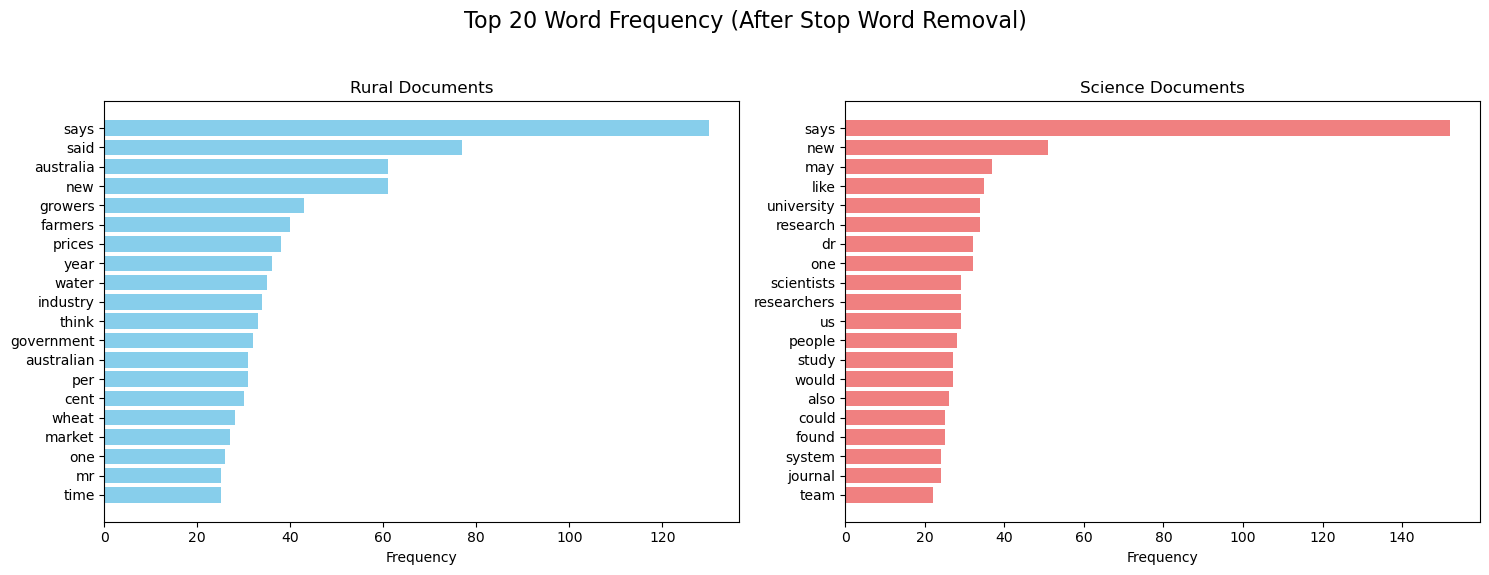


------------------------------------------------------------------
--- Part c): Train and Test Classifiers ---
Total documents: 1122
Training set size: 785 (70%)
Testing set size: 337 (30%)

--- Gaussian Naive Bayes Results ---
GaussianNB (Count Vectorizer):
Accuracy: 0.9080
GaussianNB (Binary/OHE Vectorizer):
Accuracy: 0.9139

--- Logistic Regression Results ---
Logistic Regression (Count Vectorizer):
Accuracy: 0.8961
Logistic Regression (Binary/OHE Vectorizer):
Accuracy: 0.9050

All four model/vectorizer combinations have been trained and evaluated.


In [3]:
# Here comes your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.data import find
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# check for stopwords file, or download it if its not available
try:
    find('corpora/stopwords')
except LookupError:
    print("NLTK 'stopwords' resource not found. Downloading...")
    nltk.download('stopwords')


# A manual, robust function to extract unique documents from the source text
def extract_documents_and_labels(content_string, label):
    documents = []
    source_splits = re.split(r'\\s*', content_string)
    
    for text in source_splits:
        document = text.strip()
        if document:
            # Replace internal newlines with a space to keep multi-line sentences together
            document = document.replace('\n', ' ').strip() 
            documents.append((document, label))
            
    return documents


all_data = []

# add all text lines from rural.txt in a list for later use
rural_documents_list = []
with open('rural.txt', 'r') as f:
    for line in f:
        rural_documents_list.append(line)

for doc in rural_documents_list:
    all_data.append((doc, 'rural'))

# add all text lines from science.txt in a list for later use
science_documents_list = []
with open('science.txt', 'r') as f:
    for line in f:
        science_documents_list.append(line)

for doc in science_documents_list:
    all_data.append((doc, 'science'))
    
# generate the dataframe
df = pd.DataFrame(all_data, columns=['Document', 'Class'])

print("--- Part a): Creating DataFrame ---")
print(f"DataFrame successfully created with {len(df)} unique documents.")
print(df.head())
print("------------------------------------------------------------------")

# removing stopwords from the (down)loaded file
print("--- Part b): Remove Stop Words and Plot Word Frequency ---")

STOP_WORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    # Find all sequences of 2 or more alphabetic characters
    words = re.findall(r'[a-z]{2,}', text) 
    words = [word for word in words if word not in STOP_WORDS]
    return ' '.join(words)

df['Cleaned_Document'] = df['Document'].apply(clean_text)

# Prepare data for plotting
rural_text = ' '.join(df[df['Class'] == 'rural']['Cleaned_Document'])
science_text = ' '.join(df[df['Class'] == 'science']['Cleaned_Document'])

# Use CountVectorizer to get word counts (token_pattern ensures words are 2+ chars)
vectorizer_rural = CountVectorizer(token_pattern=r'\b[a-z]{2,}\b')
rural_counts = vectorizer_rural.fit_transform([rural_text]).toarray().flatten()
rural_words = vectorizer_rural.get_feature_names_out()
rural_freq = pd.DataFrame({'word': rural_words, 'count': rural_counts}).sort_values(by='count', ascending=False).head(20)

vectorizer_science = CountVectorizer(token_pattern=r'\b[a-z]{2,}\b')
science_counts = vectorizer_science.fit_transform([science_text]).toarray().flatten()
science_words = vectorizer_science.get_feature_names_out()
science_freq = pd.DataFrame({'word': science_words, 'count': science_counts}).sort_values(by='count', ascending=False).head(20)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Top 20 Word Frequency (After Stop Word Removal)', fontsize=16)

axes[0].barh(rural_freq['word'], rural_freq['count'], color='skyblue')
axes[0].set_title('Rural Documents')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

axes[1].barh(science_freq['word'], science_freq['count'], color='lightcoral')
axes[1].set_title('Science Documents')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("")
print("------------------------------------------------------------------")


print("--- Part c): Train and Test Classifiers ---")

X = df['Cleaned_Document']
y = df['Class']

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Total documents: {len(X)}")
print(f"Training set size: {len(X_train)} (70%)")
print(f"Testing set size: {len(X_test)} (30%)")


# 1. Count Vectorization
count_vectorizer = CountVectorizer()
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

# 2. One-Hot Encoding
binary_vectorizer = CountVectorizer(binary=True)
X_train_bin = binary_vectorizer.fit_transform(X_train)
X_test_bin = binary_vectorizer.transform(X_test)


print("\n--- Gaussian Naive Bayes Results ---")

# Must convert to dense matrix (as per Hint 1: use .toarray() for GaussianNB)

# GNB with Count Vectorizer (CV)
X_train_gnb_cv = X_train_cv.toarray() 
X_test_gnb_cv = X_test_cv.toarray()

gnb_cv = GaussianNB()
gnb_cv.fit(X_train_gnb_cv, y_train)
y_pred_gnb_cv = gnb_cv.predict(X_test_gnb_cv)

print("GaussianNB (Count Vectorizer):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb_cv):.4f}")
# print(classification_report(y_test, y_pred_gnb_cv))


# GNB with Binary/OHE Vectorizer (Binary)
X_train_gnb_bin = X_train_bin.toarray()
X_test_gnb_bin = X_test_bin.toarray()

gnb_bin = GaussianNB()
gnb_bin.fit(X_train_gnb_bin, y_train)
y_pred_gnb_bin = gnb_bin.predict(X_test_gnb_bin)

print("GaussianNB (Binary/OHE Vectorizer):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb_bin):.4f}")
# print(classification_report(y_test, y_pred_gnb_bin))


print("\n--- Logistic Regression Results ---")

# LR with Count Vectorizer (CV)
lr_cv = LogisticRegression(random_state=42, max_iter=2000)
lr_cv.fit(X_train_cv, y_train)
y_pred_lr_cv = lr_cv.predict(X_test_cv)

print("Logistic Regression (Count Vectorizer):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_cv):.4f}")
# print(classification_report(y_test, y_pred_lr_cv))

# LR with Binary/OHE Vectorizer (Binary)
lr_bin = LogisticRegression(random_state=42, max_iter=2000)
lr_bin.fit(X_train_bin, y_train)
y_pred_lr_bin = lr_bin.predict(X_test_bin)

print("Logistic Regression (Binary/OHE Vectorizer):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_bin):.4f}")
# print(classification_report(y_test, y_pred_lr_bin))

print("\nAll four model/vectorizer combinations have been trained and evaluated.")